# COMP9417 HW1 - z5166086

## Report

### 1) TV Feature Theta Parameters

After 500 episodes of training at a learning rate of 0.01, and starting with initial theta values of theta0 = -1, theta1 = -1.5, the final theta values are:
__theta0: 10.11283406777275__
and
__theta1: 8.271831294479673__


```
========== INITIAL ==========
theta0: -1
theta1: -0.5
loss: 262.4344672040823
RMSE (test set): 15.584863493799581

========== 500 epochs of training ==========
learning_rate: 0.01
theta0: 10.11283406777275
theta1: 8.271831294479673
loss: 13.252115281967612
RMSE (trianing_set): 3.6403454893687783
RMSE (test set): 3.9085603448797355
```

### 2) Change in Cost Function

#### TV Training

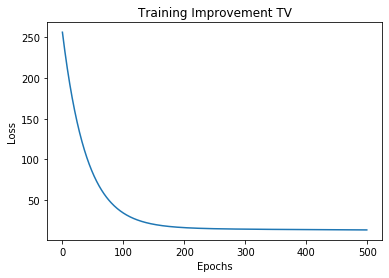

In [32]:
plt.title('Training Improvement TV')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(tv_losses)

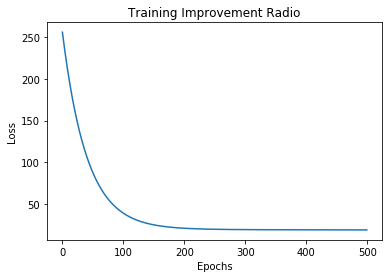

In [31]:
plt.title('Training Improvement Radio')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(radio_losses)

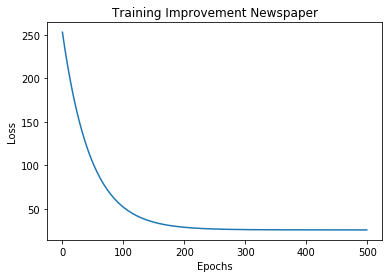

In [30]:
plt.title('Training Improvement Newspaper')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(newspaper_losses)

### 3) RMSE for training set when Using TV Feature

RMSE(training) = 3.6403454893687783

### 4) RMSE For test set when using TV Feature

RMSE(test) = 3.9085603448797355

### 5) RMSE For test set when using Radio Feature

RMSE(test) = 4.20042579511254


### 6) RMSE for test set when using Newspaper Feature

RMSE(test) = 5.427909854899054

### 7) Compare performance of three models

When looking at the results of the test sets (RMSE) we cn see that using the TV feature results in the best results, followed by the Radio feature and finally the Newspaper feature returns the highest loss (performs the worst).

From best to worst:
1. TV
2. Radio
3. Newspaper

### The below section is the code used to generate the above results

### Preprocessing

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
def normalise(vector):
    vector = [(x - min(vector))/(max(vector)-min(vector)) for x in vector]
    return vector

In [19]:
# normalise the data
normalised = df[['TV', 'Radio', 'Newspaper']].apply(normalise)

normalised_tv = pd.concat([df['Sales'], normalised['TV']], axis = 1, keys=['Sales', 'Data'])
normalised_radio = pd.concat([df['Sales'], normalised['Radio']], axis = 1, keys=['Sales', 'Data'])
normalised_newspaper = pd.concat([df['Sales'], normalised['Newspaper']], axis = 1, keys=['Sales', 'Data'])

normalised_all = pd.concat([normalised, df['Sales']], axis=1)
print(normalised_all)

           TV     Radio  Newspaper  Sales
0    0.775786  0.762097   0.605981   22.1
1    0.148123  0.792339   0.394019   10.4
2    0.055800  0.925403   0.606860    9.3
3    0.509976  0.832661   0.511873   18.5
4    0.609063  0.217742   0.510994   12.9
..        ...       ...        ...    ...
195  0.126818  0.074597   0.118734    7.6
196  0.316199  0.098790   0.068602    9.7
197  0.596212  0.187500   0.053650   12.8
198  0.956713  0.846774   0.579595   25.5
199  0.782550  0.173387   0.073879   13.4

[200 rows x 4 columns]


### What do the correlations roughly look like?

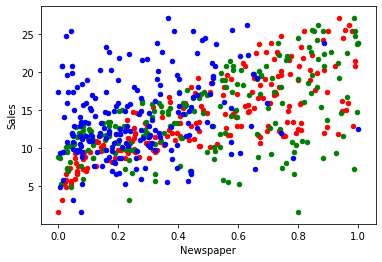

In [20]:
ax = normalised_all.plot(kind='scatter', x='TV', y='Sales', color='r')
ax = normalised_all.plot(kind='scatter', x='Radio', y='Sales', color='g', ax=ax)
ax = normalised_all.plot(kind='scatter', x='Newspaper', y='Sales', color='b', ax=ax)

## Gradient Descent

In [33]:
import math

class Fit:
    
    def __init__(self, data):
        self.theta0 = -1
        self.theta1 = -0.5
        self.training_set = data[0:190]
        self.test_set = data[190:200]
        self.learning_rate = 0.01
        
    def predict(self, data):
        return self.theta0 + self.theta1 * data
    
    def loss_function(self, data_set):
        total_error = 0
        n = 0
        for i, row in data_set.iterrows():
            h = self.predict(row['Data'])
            y = row['Sales']
            error_squared = (y-h)**2
            total_error += error_squared
            n += 1
        return total_error / n
    
    def rmse(self, data_set):
        return math.sqrt(self.loss_function(data_set))
    
    def update(self):
        update0 = 0
        update1 = 0
        n = 0
        
        for i, row in self.training_set.iterrows():
            h = self.predict(row['Data'])
            y = row['Sales']
            error = (y-h)
            update0 += error
            update1 += error * row['Data']
            n += 1
            
        update0 = update0 * self.learning_rate / n
        update1 = update1 * self.learning_rate / n
        self.theta0 += update0
        self.theta1 += update1
        
    def train(self, epochs):
        
        losses = []
        
        print("========== INITIAL ==========")
        print("theta0:", self.theta0)
        print("theta1:", self.theta1)
        print("loss:", self.loss_function(self.training_set))
        print("RMSE (test set):", self.rmse(self.test_set))
        
        for x in range(epochs):
            self.update()
            losses.append(self.loss_function(self.training_set))
        
        print()
        print("==========", epochs, "epochs of training", "==========")
        print("learning_rate:", self.learning_rate)
        print("theta0:", self.theta0)
        print("theta1:", self.theta1)
        print("loss:", self.loss_function(self.training_set))
        print("RMSE (training_set):", self.rmse(self.training_set))
        print("RMSE (test set):", self.rmse(self.test_set))
        
        return losses    

### TV Regression

========== INITIAL ==========
theta0: -1
theta1: -0.5
loss: 262.4344672040823
RMSE (test set): 15.584863493799581

========== 500 epochs of training ==========
learning_rate: 0.01
theta0: 10.11283406777275
theta1: 8.271831294479673
loss: 13.252115281967612
RMSE (trianing_set): 3.6403454893687783
RMSE (test set): 3.9085603448797355


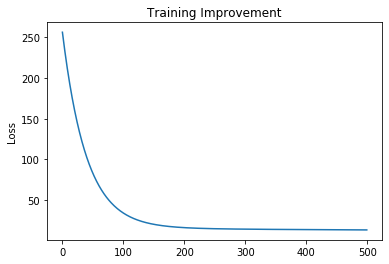

In [22]:
gd_tv = Fit(normalised_tv)
tv_losses = gd_tv.train(500)
plt.title('Training Improvement')
plt.ylabel('Loss')
plt.plot(tv_losses)

### Radio Regression

========== INITIAL ==========
theta0: -1
theta1: -0.5
loss: 261.7335389416262
RMSE (test set): 15.57762765176991

========== 500 epochs of training ==========
learning_rate: 0.01
theta0: 10.822122481737319
theta1: 7.013200578794312
loss: 18.986265141337817
RMSE (trianing_set): 4.357323162371345
RMSE (test set): 4.20042579511254


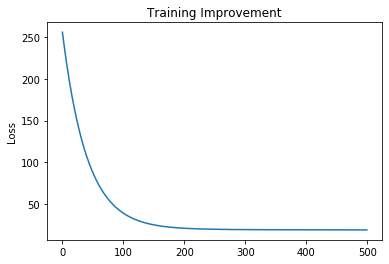

In [23]:
gd_radio = Fit(normalised_radio)
radio_losses = gd_radio.train(500)
plt.title('Training Improvement')
plt.ylabel('Loss')
plt.plot(radio_losses)

### Newspaper Regression

========== INITIAL ==========
theta0: -1
theta1: -0.5
loss: 258.0289582376239
RMSE (test set): 15.417433071529691

========== 500 epochs of training ==========
learning_rate: 0.01
theta0: 12.96665930015575
theta1: 3.8374141504698636
loss: 25.693801613431113
RMSE (trianing_set): 5.068905366391358
RMSE (test set): 5.427909854899054


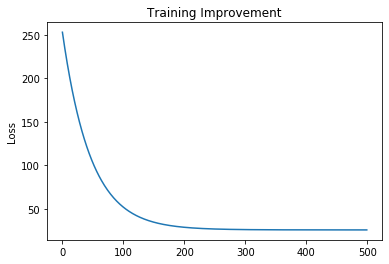

In [24]:
gd_newspaper = Fit(normalised_newspaper)
newspaper_losses = gd_newspaper.train(500)
plt.title('Training Improvement')
plt.ylabel('Loss')
plt.plot(newspaper_losses)